In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lidar_diff_ray_casting import fast_voxel_traversal_polar_numba

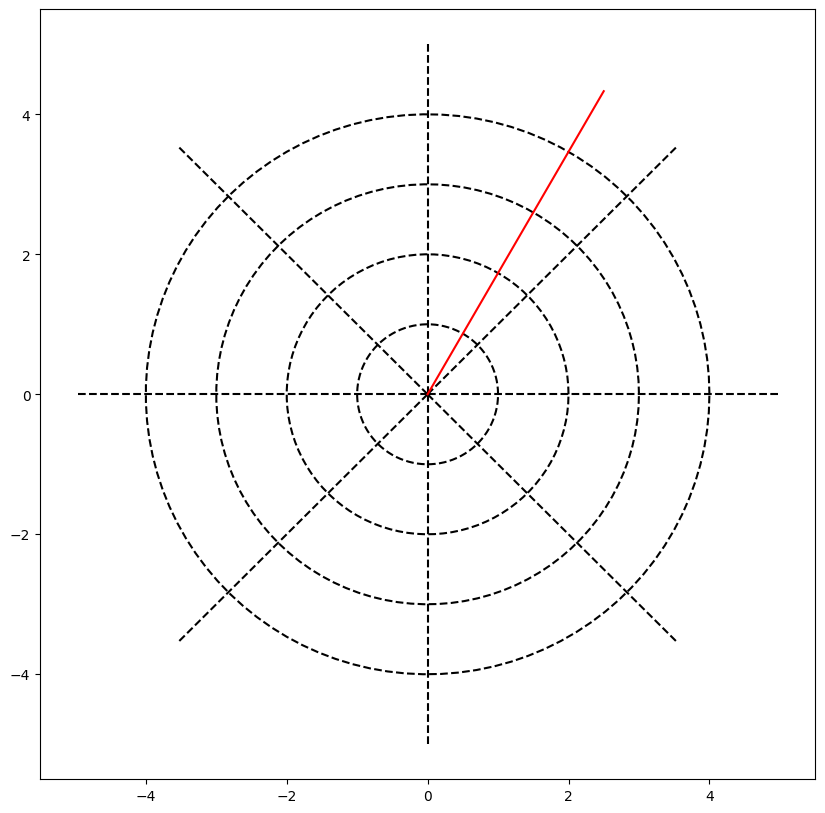

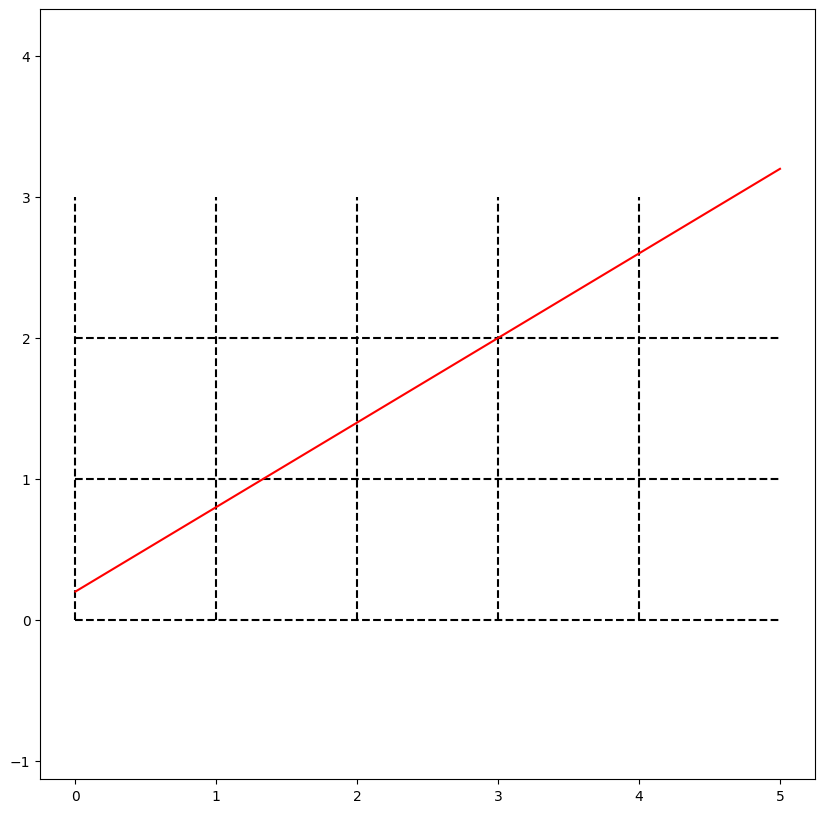

In [11]:
# Grid parameters
num_azimuth = 8
num_radius = 5
num_z = 3
r_max = 5.0
z_min = 0.0
z_max = 3.0
origin_z = 0.2

# define a single ray
ray_azimuth = 60 / 180 * np.pi
ray_elevation = np.arctan(0.6)

ray_directions = np.array(
    [
        np.cos(ray_azimuth) * np.cos(ray_elevation),
        np.sin(ray_azimuth) * np.cos(ray_elevation),
        np.sin(ray_elevation),
    ]
)[np.newaxis, :]

# first plot the polar grid in the top view
def plot_polar_grid(num_azimuth, num_radius, r_max):
    # plot concentric circles
    t = np.linspace(0, 2*np.pi, 100)
    for r in np.linspace(0., r_max, num_radius, endpoint=False):
        plt.plot(r*np.cos(t), r*np.sin(t), 'k--')

    
def plot_azimuth_grid(num_azimuth, r_max):
    for az in np.linspace(0, 2*np.pi, num_azimuth, endpoint=False):
        plt.plot([0, r_max*np.cos(az)], [0, r_max*np.sin(az)], 'k--')

def plot_ray_top_view(ray_azimuth, r_max):
    plt.plot([0, r_max*np.cos(ray_azimuth)], [0, r_max*np.sin(ray_azimuth)], 'r-')

def plot_z_d_slice(z_min, z_max, num_z, r_max, num_radius):
    for z in np.linspace(z_min, z_max, num_z, endpoint=False):
        plt.plot([0, r_max], [z, z], 'k--')
    for r in np.linspace(0, r_max, num_radius, endpoint=False):
        plt.plot([r, r], [z_min, z_max], 'k--')

def plot_ray_z_d_slice( r_max, z_min, z_max, origin_z,ray_elevation):
    rs = np.linspace(0, r_max, 10)
    zs = np.tan(ray_elevation) * rs + origin_z
    plt.plot(rs, zs, 'r-')


plt.figure(figsize=(10, 10))
plot_polar_grid(num_azimuth, num_radius, r_max)
plot_azimuth_grid(num_azimuth, r_max)
plot_ray_top_view(ray_azimuth, r_max)
plt.show()

# plot z-d slice
plt.figure(figsize=(10, 10))
plot_z_d_slice(z_min, z_max, num_z, r_max, num_radius)
plot_ray_z_d_slice(r_max, z_min, z_max, origin_z, ray_elevation)
plt.axis('equal')
plt.show()

In [12]:
# now do the actual traversal
results = fast_voxel_traversal_polar_numba(
    origin_z=origin_z,
    ray_directions=ray_directions,
    r_max=r_max,
    z_min=z_min,
    z_max=z_max,
    num_azimuth=num_azimuth,
    num_radius=num_radius,
    num_z=num_z,
)
results

[array([[1, 0, 0],
        [1, 1, 0],
        [1, 1, 1],
        [1, 2, 1],
        [1, 2, 2],
        [1, 3, 2],
        [1, 4, 2]], dtype=int32)]

The indices are (azimuth, radius, z). The above results agree with visual inspection of the figures above.